## 1. Environment setup

In [2]:

import os
from pathlib import Path
import numpy as np
import pandas as pd

# Path to the repository
# Make sure this notebook is in the same folder as `generators.py`
import sys
sys.path.append("/home/RUS_CIP/st186635/DeepDrawSimDataset/src/pipelines")
from generators import (
    DatasetConfig,
    iter_ddacs,
    sample_simulations,
    get_simulation_by_id,
    count_available_simulations,
)

## 2. Dataset configuration

In [3]:
DATA_DIR = "/mnt/data/hsh"        # root of your dataset
H5_SUBDIR = "data_copy"           # folder containing .h5 files
META_FILE = "mapping_01.csv"      # metadata CSV
ID_COL = None                     # auto-detect ID column
FEAT_COLS = None                  # use all columns except ID

cfg = DatasetConfig(
    data_dir=DATA_DIR,
    h5_subdir=H5_SUBDIR,
    metadata_file=META_FILE,
    id_column=ID_COL,
    feature_columns=FEAT_COLS,
)

print(cfg)

DatasetConfig(data_dir='/mnt/data/hsh', h5_subdir='data_copy', metadata_file='mapping_01.csv', id_column=None, feature_columns=None)


## 3. Count available samples

In [4]:
total = count_available_simulations(
    data_dir=cfg.data_dir,
    h5_subdir=cfg.h5_subdir,
    metadata_file=cfg.metadata_file,
    id_column=cfg.id_column,
    feature_columns=cfg.feature_columns,
)

print(f"✅ Total available simulations: {total}")

✅ Total available simulations: 228


## 4. Preview first few entries from metadata

In [5]:

meta_path = Path(cfg.data_dir) / cfg.metadata_file
df = pd.read_csv(meta_path)
display(df.head())


,new_id,orig_id,radii2,radii1,delta,cr,height
0,001.h5,tool_radii2_20_radii1_5_cr_1.1_delta_0_height_...,20,5,0.0,1.1,25
1,002.h5,tool_radii2_20_radii1_5_cr_1.1_delta_0_height_...,20,5,0.0,1.1,30
2,003.h5,tool_radii2_20_radii1_5_cr_1.1_delta_0_height_...,20,5,0.0,1.1,35
3,004.h5,tool_radii2_20_radii1_5_cr_1.1_delta_0_height_...,20,5,0.0,1.1,40
4,005.h5,tool_radii2_20_radii1_5_cr_1.1_delta_0_height_...,20,5,0.0,1.1,45


## 5. Iterate over first few H5 files


In [6]:

from itertools import islice

print("Listing first 3 samples:")
for sim_id, meta, h5_path in islice(
    iter_ddacs(cfg.data_dir, cfg.h5_subdir, cfg.metadata_file), 3
):
    print(f"ID: {sim_id:>3} | File: {h5_path.name} | Metadata shape: {meta.shape}")

Listing first 3 samples:
ID:   1 | File: 001.h5 | Metadata shape: (6,)
ID:   2 | File: 002.h5 | Metadata shape: (6,)
ID:   3 | File: 003.h5 | Metadata shape: (6,)


## 6. Random sampling of simulations


In [7]:

print("Random sample of 2 simulations:")
for sim_id, meta, h5_path in sample_simulations(
    n=2,
    data_dir=cfg.data_dir,
    h5_subdir=cfg.h5_subdir,
    metadata_file=cfg.metadata_file,
    seed=42,
):
    print(f"🧩 Sample ID: {sim_id:>3} | File: {h5_path.name}")

Random sample of 2 simulations:
🧩 Sample ID: 164 | File: 164.h5
🧩 Sample ID:  29 | File: 029.h5


## 7. Fetch a specific simulation by ID


In [8]:

example_id = 1
item = get_simulation_by_id(
    sim_id=example_id,
    data_dir=cfg.data_dir,
    h5_subdir=cfg.h5_subdir,
    metadata_file=cfg.metadata_file,
)

if item:
    sid, meta_vals, h5_path = item
    print(f"Found simulation {sid}: {h5_path.name}")
    print(f"Metadata values: {meta_vals}")
else:
    print(f"Simulation {example_id} not found.")

Found simulation 1: 001.h5
Metadata values: ['tool_radii2_20_radii1_5_cr_1.1_delta_0_height_25.h5' 20 5 0.0 1.1 25]




# choose numeric columns only


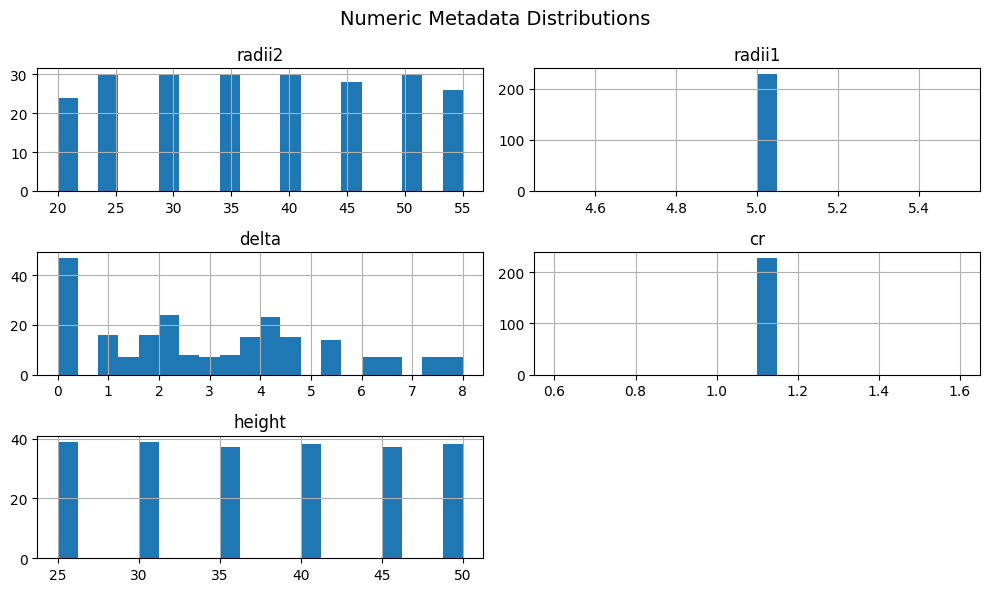

In [9]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if num_cols:
    df[num_cols].hist(figsize=(10, 6), bins=20)
    plt.suptitle("Numeric Metadata Distributions", fontsize=14)
    plt.tight_layout()
else:
    print("No numeric columns to visualize.")